## Sentiment Analysis

In [8]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer

import requests
import zipfile
import os

from nltk.tokenize import word_tokenize

In [6]:
# Ensure necessary NLTK resources are downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
# Download NLTK punkt tokenizer models (if not already downloaded)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install requests

In [9]:
# Set display options for a clean tabular output
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width to fit more columns
pd.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns

# Load the dataset
file_path = "/content/songs_dataframe_cleaned.csv"
songs_dataframe_cleaned = pd.read_csv(file_path)

# Display the top 3 records
display(songs_dataframe_cleaned.head(3))


,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_expanded,lyrics_without_special_characters
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838,0.471,0.193,100.059,79500.0,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school crew slide Give whenever want whip whenever want B

In [10]:
# Display the shape of the dataset
songs_dataframe_cleaned_shape = songs_dataframe_cleaned.shape
print(f"The shape of the cleaned dataset is: {songs_dataframe_cleaned_shape}")

The shape of the cleaned dataset is: (73394, 19)


### Tokenization

In [11]:
# Function to tokenize the lyrics
def tokenize_lyrics(lyrics):
    if isinstance(lyrics, str):  # Check if the lyrics is a string
        return word_tokenize(lyrics)
    else:
        return []  # Return an empty list if lyrics are not a string

# Ensure that NaN or None values are handled by converting them to empty strings
songs_dataframe_cleaned['lyrics_without_special_characters'] = songs_dataframe_cleaned['lyrics_without_special_characters'].fillna('')

# Create the new DataFrame with id, lyrics, and tokenized lyrics
tokenized_songs_dataframe = songs_dataframe_cleaned[['id', 'lyrics', 'lyrics_without_special_characters']].copy()

# Apply tokenization
tokenized_songs_dataframe['tokenized_lyrics'] = tokenized_songs_dataframe['lyrics_without_special_characters'].apply(tokenize_lyrics)

In [12]:
# Display the DataFrame in tabular format after tokenization
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width to fit more columns
pd.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns
display(tokenized_songs_dataframe.head(3))

,id,lyrics,lyrics_without_special_characters,tokenized_lyrics
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school crew slide Give whenever want whip whenever want Baby Anywhere everywhere baby world are not it alright Baby world are not it Uh got nigga home one side Best friend dyke fucked around times momma alike fight tell make money tell make wife tell bitch you crazy fuck wrong you excuse French I am long kisser try tell I am one that is hitting say what niggas say what niggas right tonight Put something tight judge me I would get life love like brother fuck like husband Pussy like oven hot put tongue rub it genie bottle Pussy wet Imma need goggles tell that is mine tell stop lying mine else say worry Lil Tune holler me you you are not high school crew slide Give whenever want whip whenever want Baby Anywhere everywhere baby world are not it Baby world are not it know want boy see tryin keep pushing Imma let slide close eyes and horizon ready come get Yeah yeah yeah yeah,"[said, came, Jamaica, owned, couple, acres, couple, fake, visas, because, never, got, papers, Gave, love, fucking, heart, breakers, getting, money, movers, shakers, mixed, couple, things, bald, like, couple, rings, Bricks, condo, grams, singsing, Left, arm, baby, mother, tatted, 5year, bid, North, ratted, Anyway, felt, him, helped, him, put, lock, seatbelt, Took, Belgium, welcome, Bitches, pretty, that, is, seldom, box, better, box, held, I, am, Momma, Dee, order, call, Daddy, like, daughters, like, get, drunk, like, sober, That, is, top, toppa, never, fuck, beginners, let, play, pussy, lick, fingers, I, am, zone, holler, me, you, you, are, not, high, school, crew, ...]"
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel

### Lemmatization

In [13]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize the tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Create the new DataFrame with id, lyrics, tokenized_lyrics, and lemmatized_lyrics
lemmatized_songs_dataframe = tokenized_songs_dataframe[['id', 'lyrics', 'tokenized_lyrics']].copy()

# Apply lemmatization
lemmatized_songs_dataframe['lemmatized_lyrics'] = lemmatized_songs_dataframe['tokenized_lyrics'].apply(lemmatize_tokens)

In [14]:
# Display the DataFrame in tabular format after lemmatization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
display(lemmatized_songs_dataframe.head(3))

,id,lyrics,tokenized_lyrics,lemmatized_lyrics
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","[said, came, Jamaica, owned, couple, acres, couple, fake, visas, because, never, got, papers, Gave, love, fucking, heart, breakers, getting, money, movers, shakers, mixed, couple, things, bald, like, couple, rings, Bricks, condo, grams, singsing, Left, arm, baby, mother, tatted, 5year, bid, North, ratted, Anyway, felt, him, helped, him, put, lock, seatbelt, Took, Belgium, welcome, Bitches, pretty, that, is, seldom, box, better, box, held, I, am, Momma, Dee, order, call, Daddy, like, daughters, like, get, drunk, like, sober, That, is, top, toppa, never, fuck, beginners, let, play, pussy, lick, fingers, I, am, zone, holler, me, you, you, are, not, high, school, crew, ...]","[said, came, Jamaica, owned, couple, acre, couple, fake, visa, because, never, got, paper, Gave, love, fucking, heart, breaker, getting, money, mover, shaker, mixed, couple, thing, bald, like, couple, ring, Bricks, condo, gram, singsing, Left, arm, baby, mother, tatted, 5year, bid, North, ratted, Anyway, felt, him, helped, him, put, lock, seatbelt, Took, Belgium, welcome, Bitches, pretty, that, is, seldom, box, better, box, held, I, am, Momma, Dee, order, call, Daddy, like, daughter, like, get, drunk, like, sober, That, is, top, toppa, never, fuck, beginner, let, play, pussy, lick, finger, I, am, zone, holler, me, you, you, are, not, high, school, crew, ...]"
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh Got tough heart 'cause rough start love cars love stars main dream thing see never fuck I'm seem, yeah Comin' home you, baby way flick hair makes crazy I've making much time lately never time lately I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh I'm love, oh-oh-oh-oh","[Fucked, bitch, running, kids, said, never, listen, yeah, yeah, Yeah, yeah, yeah, Tell, things, bout, family, Struggle, words, said, rambling, Always, playing, games, gambling, got, string, I, am, dancing, Tell, childhood, TV, shows, Tell, something, could, run, feel, lucky, feel, lucky, yeah, 

### Stemming

In [15]:
# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Function to stem the lemmatized tokens
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Create the new DataFrame with id, lyrics, tokenized_lyrics, lemmatized_lyrics, and stemmed_lyrics
stemmed_songs_dataframe = lemmatized_songs_dataframe[['id', 'lyrics', 'tokenized_lyrics', 'lemmatized_lyrics']].copy()

# Apply stemming
stemmed_songs_dataframe['stemmed_lyrics'] = stemmed_songs_dataframe['lemmatized_lyrics'].apply(stem_tokens)

In [16]:
# Display the DataFrame in tabular format after Stemming
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
display(stemmed_songs_dataframe.head(3))

,id,lyrics,tokenized_lyrics,lemmatized_lyrics,stemmed_lyrics
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","[said, came, Jamaica, owned, couple, acres, couple, fake, visas, because, never, got, papers, Gave, love, fucking, heart, breakers, getting, money, movers, shakers, mixed, couple, things, bald, like, couple, rings, Bricks, condo, grams, singsing, Left, arm, baby, mother, tatted, 5year, bid, North, ratted, Anyway, felt, him, helped, him, put, lock, seatbelt, Took, Belgium, welcome, Bitches, pretty, that, is, seldom, box, better, box, held, I, am, Momma, Dee, order, call, Daddy, like, daughters, like, get, drunk, like, sober, That, is, top, toppa, never, fuck, beginners, let, play, pussy, lick, fingers, I, am, zone, holler, me, you, you, are, not, high, school, crew, ...]","[said, came, Jamaica, owned, couple, acre, couple, fake, visa, because, never, got, paper, Gave, love, fucking, heart, breaker, getting, money, mover, shaker, mixed, couple, thing, bald, like, couple, ring, Bricks, condo, gram, singsing, Left, arm, baby, mother, tatted, 5year, bid, North, ratted, Anyway, felt, him, helped, him, put, lock, seatbelt, Took, Belgium, welcome, Bitches, pretty, that, is, seldom, box, better, box, held, I, am, Momma, Dee, order, call, Daddy, like, daughter, like, get, drunk, like, sober, That, is, top, toppa, never, fuck, beginner, let, play, pussy, lick, finger, I, am, zone, holler, me, you, you, are, not, high, school, crew, ...]","[said, came, jamaica, own, coupl, acr, coupl, fake, visa, becaus, never, got, paper, gave, love, fuck, heart, breaker, get, money, mover, shaker, mix, coupl, thing, bald, like, coupl, ring, brick, condo, gram, sings, left, arm, babi, mother, tat, 5year, bid, north, rat, anyway, felt, him, help, him, put, lock, seatbelt, took, belgium, welcom, bitch, pretti, that, is, seldom, box, better, box, held, i, am, momma, dee, order, call, daddi, like, daughter, like, get, drunk, like, sober, that, is, top, toppa, never, fuck, beginn, let, play, pussi, lick, finger, i, am, zone, holler, me, you, you, are, not, high, school, crew, ...]"
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-o

### Vectorization

In [17]:
# Define the URL of the GloVe embeddings and the path to save the file
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
zip_file_path = "glove.6B.zip"
extract_dir = "glove.6B"

# Download the file from the URL
response = requests.get(glove_url)
with open(zip_file_path, "wb") as file:
    file.write(response.content)

# Extract the downloaded ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Path to the GloVe 50D embeddings
glove_file_path = os.path.join(extract_dir, "glove.6B.50d.txt")

# Verify if the file is extracted
if os.path.exists(glove_file_path):
    print(f"GloVe file successfully extracted to {glove_file_path}")
else:
    print("Failed to extract GloVe file.")

GloVe file successfully extracted to glove.6B/glove.6B.50d.txt


In [18]:
# Function to load GloVe embeddings (50D version)
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

# Load the GloVe model (50D vectors)
glove_model = load_glove_model("/content/glove.6B/glove.6B.50d.txt")

In [19]:
def get_glove_vector_for_lyrics(lyrics, glove_model):
    try:
        # Tokenize and convert to lowercase
        tokens = lyrics
        vectors = []

        # Iterate over each token in the lyrics
        for word in tokens:
            # Check if the word exists in the GloVe model
            if word in glove_model:
                vectors.append(glove_model[word])

        # Check if any valid vectors were found
        if vectors:
            # Return the average of all word vectors in the song
            return np.mean(vectors, axis=0)
        else:
            # Return a vector of zeros if no GloVe vectors were found for words in the song
            print(f"No valid GloVe vectors found for the lyrics: {lyrics[:30]}...")
            return np.zeros(50)  # 50D zero vector

    except Exception as e:
        # Handle any error that occurs during the process and print the error message
        print(f"Error processing lyrics: {e}")
        return np.zeros(50)  # Return a zero vector in case of error

In [21]:
# Apply GloVe vectorization to all lyrics
stemmed_songs_dataframe['glove_vector'] = stemmed_songs_dataframe['stemmed_lyrics'].apply(lambda x: get_glove_vector_for_lyrics(x, glove_model))
vectorized_songs_dataframe = stemmed_songs_dataframe.copy()
vectorized_songs_dataframe['glove_vector_numeric'] = stemmed_songs_dataframe['glove_vector'].apply(lambda x: np.mean(x))

No valid GloVe vectors found for the lyrics: ['deusvult', 'deusvult', 'deusvult', 'deusvult']...
No valid GloVe vectors found for the lyrics: ['ohohohoh', 'woahyeah', 'woahyeah']...
No valid GloVe vectors found for the lyrics: ['alittlebitofthund', 'cantyoufeelastormiscom', 'cantyoufeelitrumblingnow', 'anyhousenotbuiltonjesu', 'surelygonnacometumblingdown', 'iaintscaredofalittlebitofthund', 'iaintscar', 'ofwhattheheadlinessay', 'thesedarkdaysthatwerelivingund', 'shakemehard', 'butiwontlosefaith', 'causegodisgood', 'heisfaith', 'andiaminhiscar', 'andiaintscar', 'aintscar', 'aintscaredofalittlebitofthund', 'thisisnotmyfirstroughseason', 'thisisnotmyfirstmeanstorm', 'ihaveriddenoutsometroubl', 'soidontfeartheweathernomor', 'soletitrag', 'letitpour', 'letitcrashallaroundm', 'letitroar']...
No valid GloVe vectors found for the lyrics: []...
No valid GloVe vectors found for the lyrics: ['aleluya', 'aleluya', 'aleluya', 'aleluya', 'aleluya', 'aleluya', 'aleluya', 'aleluya', 'aleluya', 'aleluy

In [22]:
# Display the DataFrame in tabular format after vectorization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
display(vectorized_songs_dataframe.head(3))

,id,lyrics,tokenized_lyrics,lemmatized_lyrics,stemmed_lyrics,glove_vector,glove_vector_numeric
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","[said, came, Jamaica, owned, couple, acres, couple, fake, visas, because, never, got, papers, Gave, love, fucking, heart, breakers, getting, money, movers, shakers, mixed, couple, things, bald, like, couple, rings, Bricks, condo, grams, singsing, Left, arm, baby, mother, tatted, 5year, bid, North, ratted, Anyway, felt, him, helped, him, put, lock, seatbelt, Took, Belgium, welcome, Bitches, pretty, that, is, seldom, box, better, box, held, I, am, Momma, Dee, order, call, Daddy, like, daughters, like, get, drunk, like, sober, That, is, top, toppa, never, fuck, beginners, let, play, pussy, lick, fingers, I, am, zone, holler, me, you, you, are, not, high, school, crew, ...]","[said, came, Jamaica, owned, couple, acre, couple, fake, visa, because, never, got, paper, Gave, love, fucking, heart, breaker, getting, money, mover, shaker, mixed, couple, thing, bald, like, couple, ring, Bricks, condo, gram, singsing, Left, arm, baby, mother, tatted, 5year, bid, North, ratted, Anyway, felt, him, helped, him, put, lock, seatbelt, Took, Belgium, welcome, Bitches, pretty, that, is, seldom, box, better, box, held, I, am, Momma, Dee, order, call, Daddy, like, daughter, like, get, drunk, like, sober, That, is, top, toppa, never, fuck, beginner, let, play, pussy, lick, finger, I, am, zone, holler, me, you, you, are, not, high, school, crew, ...]","[said, came, jamaica, own, coupl, acr, coupl, fake, visa, becaus, never, got, paper, gave, love, fuck, heart, breaker, get, money, mover, shaker, mix, coupl, thing, bald, like, coupl, ring, brick, condo, gram, sings, left, arm, babi, mother, tat, 5year, bid, north, rat, anyway, felt, him, help, him, put, lock, seatbelt, took, belgium, welcom, bitch, pretti, that, is, seldom, box, better, box, held, i, am, momma, dee, order, call, daddi, like, daughter, like, get, drunk, like, sober, that, is, top, toppa, never, fuck, beginn, let, play, pussi, lick, finger, i, am, zone, holler, me, you, you, are, not, high, school, crew, ...]","[0.08974653, 0.10316204, 0.09011229, -0.28711596, 0.30701685, -0.07443138, -0.28884256, 0.14675121, -0.1762103, 0.15497473, -0.11771619, 0.2690226, -0.26836237, 0.0510136, 0.49038538, 0.28612027, 0.28377014, 0.04239313, -0.051632795, -0.35785016, -0.17742904, 0.27705163, 0.3541656, 0.21059477, 0.39794052, -1.3599495, -0.55661505, 0.2109708, 0.4130193, -0.5873313, 2.3701046, 0

In [23]:
# Merge the original dataframe with the vectorized dataframe on 'id'
songs_dataframe_cleaned = songs_dataframe_cleaned.merge(
    vectorized_songs_dataframe[['id', 'glove_vector','glove_vector_numeric']],
    on='id',
    how='left'
)

In [24]:
# Display the DataFrame in tabular format after Merging with original dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
display(songs_dataframe_cleaned.head(3))

,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_expanded,lyrics_without_special_characters,glove_vector,glove_vector_numeric
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838,0.471,0.193,100.059,79500.0,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school crew slide Give 

### Get the Emotion of the Song

In [25]:
def categorize_emotion(row):
    energy = row['energy']
    valence = row['valence']
    liveness = row['liveness']
    danceability = row['danceability']

    # Define logic for categorizing based on attribute thresholds
    if valence > 0.6 and energy > 0.6 and danceability > 0.6:
        return 'Happy'
    elif valence < 0.4 and energy < 0.4 and danceability < 0.4:
        return 'Sad'
    elif energy > 0.7 and valence < 0.4 and liveness > 0.5:
        return 'Angry'
    elif energy < 0.5 and valence > 0.5 and danceability > 0.4:
        return 'Relaxed'
    elif energy > 0.7 and danceability > 0.7:
        return 'Energetic'
    else:
        return 'Neutral'  # Use this for songs that don't fit clear categories

songs_dataframe_cleaned = songs_dataframe_cleaned.copy()

# Apply the function to the DataFrame
songs_dataframe_cleaned['song_emotion'] = songs_dataframe_cleaned.apply(categorize_emotion, axis=1)

# Display the DataFrame with the new emotion categories
print(songs_dataframe_cleaned[['id', 'song_emotion']].head())

                       id song_emotion
0  0Prct5TDjAnEgIqbxcldY9      Neutral
1  2ASl4wirkeYm3OWZxXKYuq      Neutral
2  69lcggVPmOr9cvPx9kLiiN          Sad
3  4U7dlZjg1s9pjdppqZy0fm        Happy
4  4v1IBp3Y3rpkWmWzIlkYju        Happy


In [26]:
#Displaying complete dataset, after emotion detection
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
display(songs_dataframe_cleaned.head(3))

,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_expanded,lyrics_without_special_characters,glove_vector,glove_vector_numeric,song_emotion
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838,0.471,0.193,100.059,79500.0,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school cre

In [27]:
# Drop the specified columns
final_songs_dataframe = songs_dataframe_cleaned.drop(['lyrics_expanded', 'lyrics_without_special_characters'], axis=1)

# Save the DataFrame as a CSV file
final_songs_dataframe.to_csv('final_songs_dataframe.csv', index=False)

# If you're using Google Colab, you can download the file like this:
from google.colab import files
files.download('final_songs_dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Get the count of each emotion in the 'song_emotion' column
emotion_counts = final_songs_dataframe['song_emotion'].value_counts()

# Display the count of each category
print(emotion_counts)


song_emotion
Neutral      52084
Happy         8964
Relaxed       5400
Sad           3630
Angry         1681
Energetic     1635
Name: count, dtype: int64


In [29]:
# Define a mapping for the song_emotion to numeric values
emotion_mapping = {
    'Neutral': 1,
    'Relaxed': 2,
    'Sad': 3,
    'Angry': 4,
    'Happy': 5,
    'Energetic': 5
}

# Apply the mapping to the 'song_emotion' column
songs_dataframe_cleaned['song_emotion_value'] = songs_dataframe_cleaned['song_emotion'].map(emotion_mapping)

# Create the new dataset with the numeric song_emotion
songs_dataframe_1 = songs_dataframe_cleaned.copy()

# Display the updated dataframe
print(songs_dataframe_1[['id', 'song_emotion', 'song_emotion_value']].head(10))

# Optionally, save the dataset to CSV
songs_dataframe_1.to_csv('songs_dataframe_1.csv', index=False)


                       id song_emotion  song_emotion_value
0  0Prct5TDjAnEgIqbxcldY9      Neutral                   1
1  2ASl4wirkeYm3OWZxXKYuq      Neutral                   1
2  69lcggVPmOr9cvPx9kLiiN          Sad                   3
3  4U7dlZjg1s9pjdppqZy0fm        Happy                   5
4  4v1IBp3Y3rpkWmWzIlkYju        Happy                   5
5  5tA3ImW310llKo8EMBj2Ga      Neutral                   1
6  0fROT4kK5oTm8xO8PX6EJF        Happy                   5
7  1xBFhv5faebv3mmwxx7DnS      Neutral                   1
8  0gNNToCW3qjabgTyBSjt3H      Neutral                   1
9  1SCFa6gt3r6juLsIqpdwY3      Neutral                   1


In [30]:
# List all the column names (features) in the final_songs_dataframe
print(final_songs_dataframe.columns)


Index(['id', 'name', 'album_name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'lyrics', 'glove_vector', 'glove_vector_numeric', 'song_emotion'], dtype='object')


## Model Training

## Defining the Performance Metrics for each Model

In [31]:
performance_metrics = {
    "logistic_regression": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "logistic_regression_cv": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "random_forest": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "random_forest_cv": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    }
}

In [33]:
#imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder

#cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

#visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Extracting the Features

In [35]:
# Select the relevant features and target column
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'glove_vector_numeric', ]
target = 'song_emotion'

# Extract the features and target data
X = songs_dataframe_1[features]
y = songs_dataframe_1[target]

### Label Encoding

In [36]:
# Encode categorical columns ('key' and 'mode')
label_encoder_key = LabelEncoder()
label_encoder_mode = LabelEncoder()

X['key'] = label_encoder_key.fit_transform(X['key'])
X['mode'] = label_encoder_mode.fit_transform(X['mode'])

<ipython-input-36-0a50c7ef5395>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['key'] = label_encoder_key.fit_transform(X['key'])
<ipython-input-36-0a50c7ef5395>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mode'] = label_encoder_mode.fit_transform(X['mode'])


### Splitting & Standadizing Features using Standard Scalar

In [37]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [38]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1-score": f1_score
}

# Update the performance_metrics dictionary using a map
performance_metrics["logistic_regression"].update(metrics)

In [39]:
# Print the metrics
print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Logistic Regression Performance Metrics:
Accuracy: 0.8601
Precision: 0.8563
Recall: 0.8601
F1-Score: 0.8572


### Visualization(Logistic Regression)

<ipython-input-40-c0969eacef3a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette="Blues_d")


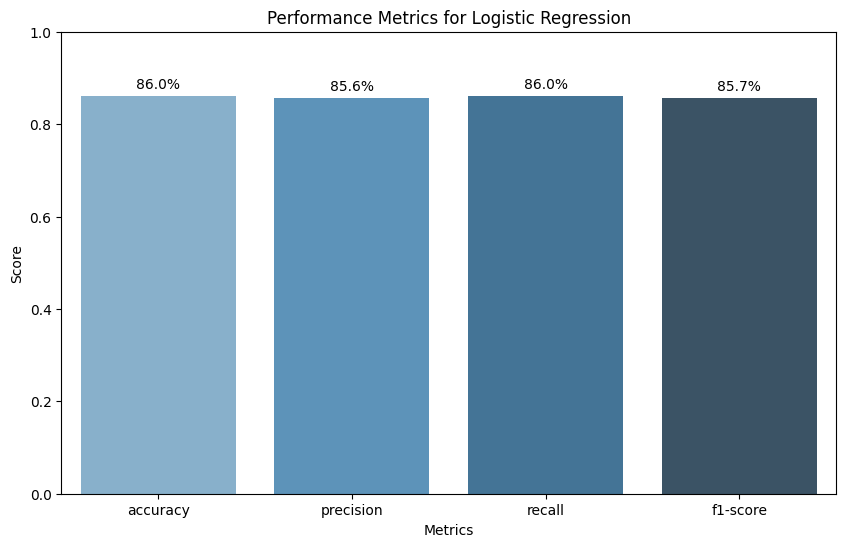

In [40]:
# Prepare data for visualization
metric_names = ["accuracy", "precision", "recall", "f1-score"]
metric_values = [accuracy, precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=metric_names, y=metric_values, palette="Blues_d")

# Add percentage labels on top of each bar
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.01, f"{value * 100:.1f}%", ha='center', va='bottom')

# Customize the plot
plt.ylim(0, 1)
plt.title("Performance Metrics for Logistic Regression")
plt.ylabel("Score")
plt.xlabel("Metrics")

# Show the plot
plt.show()

### Cross Validation(Logistic Regression)

In [41]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# StratifiedKFold cross-validator with balanced folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store each fold's metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation with standardization in each fold
for train_index, test_index in cv.split(X, y):
    # Split data into training and testing sets for the fold using .iloc
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features within the fold
    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)

    # Train the model on the scaled training fold
    logreg.fit(X_train_fold_scaled, y_train_fold)

    # Predict on the scaled test fold
    y_pred_fold = logreg.predict(X_test_fold_scaled)

    # Calculate and store metrics for this fold
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold, average='weighted'))
    recall_scores.append(recall_score(y_test_fold, y_pred_fold, average='weighted'))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold, average='weighted'))

# Calculate mean and standard deviation of each metric across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1_score = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1_score = np.std(f1_scores)

metrics = {
    "accuracy": mean_accuracy,
    "precision": mean_precision,
    "recall": mean_recall,
    "f1-score": mean_f1_score
}

# Update the performance_metrics dictionary using a map
performance_metrics["logistic_regression_cv"].update(metrics)

# Print cross-validation results
print(f"Cross-validation Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Cross-validation Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Cross-validation Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Cross-validation Mean F1-Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")


Cross-validation Mean Accuracy: 0.8588 ± 0.0027
Cross-validation Mean Precision: 0.8546 ± 0.0031
Cross-validation Mean Recall: 0.8588 ± 0.0027
Cross-validation Mean F1-Score: 0.8551 ± 0.0030


### Visualization(Logistic Regression Cross Validation)

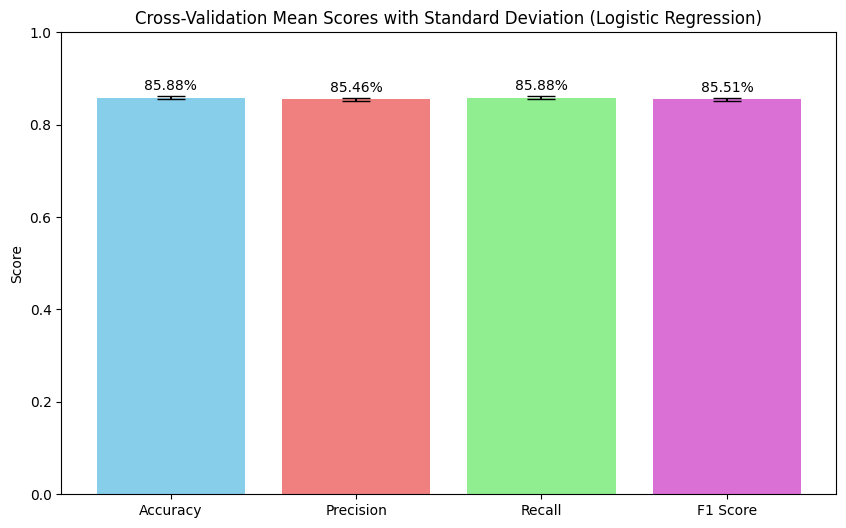

In [42]:
# Data for the plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
mean_values = [mean_accuracy, mean_precision, mean_recall, mean_f1_score]
std_values = [std_accuracy, std_precision, std_recall, std_f1_score]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, mean_values, yerr=std_values, capsize=10, color=['skyblue', 'lightcoral', 'lightgreen', 'orchid'])
plt.ylabel("Score")
plt.title("Cross-Validation Mean Scores with Standard Deviation (Logistic Regression)")

# Annotate each bar with the mean percentage score
for bar, mean, std in zip(bars, mean_values, std_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{mean:.2%}", ha='center', va='bottom')

plt.ylim(0, 1)  # Scale to percentage
plt.show()


### Random Forest

In [43]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multi-class
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Store the metrics for Random Forest
metrics_rf = {
    "accuracy": accuracy_rf,
    "precision": precision_rf,
    "recall": recall_rf,
    "f1-score": f1_rf
}

# Update the performance_metrics dictionary using a map
performance_metrics["random_forest"].update(metrics_rf)

# Print out the performance metrics for Random Forest
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")


Random Forest Accuracy: 0.9998
Random Forest Precision: 0.9998
Random Forest Recall: 0.9998
Random Forest F1-Score: 0.9998


In [44]:
import joblib
# Save the models using joblib
joblib.dump(rf, 'rf_model.joblib')

['rf_model.joblib']

### Visualization(Random Forest)

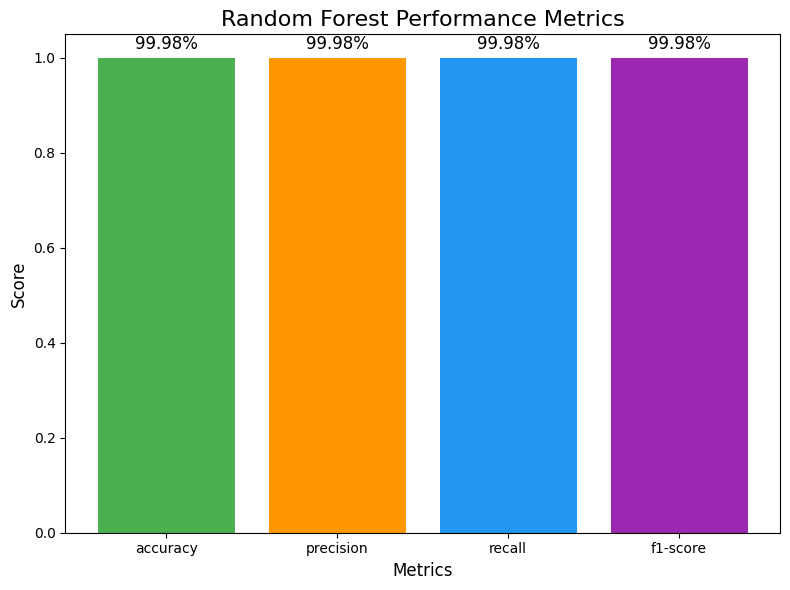

In [45]:
# Visualization
plt.figure(figsize=(8, 6))

# Bar chart for Random Forest metrics
plt.bar(metrics_rf.keys(), metrics_rf.values(), color=['#4CAF50', '#FF9800', '#2196F3', '#9C27B0'])

# Add percentage labels on top of each bar
for i, (metric, value) in enumerate(metrics_rf.items()):
    plt.text(i, value + 0.01, f'{value*100:.2f}%', ha='center', va='bottom', fontsize=12)

# Set plot labels and title
plt.title("Random Forest Performance Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metrics", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Random Forest (Cross Validation)

In [46]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# StratifiedKFold cross-validator with balanced folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store each fold's metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation with standardization in each fold
for train_index, test_index in cv.split(X, y):
    # Split data into training and testing sets for the fold using .iloc
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features within the fold
    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)

    # Train the model on the scaled training fold
    rf.fit(X_train_fold_scaled, y_train_fold)

    # Predict on the scaled test fold
    y_pred_fold = rf.predict(X_test_fold_scaled)

    # Calculate and store metrics for this fold
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold, average='weighted'))
    recall_scores.append(recall_score(y_test_fold, y_pred_fold, average='weighted'))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold, average='weighted'))

# Calculate mean and standard deviation of each metric across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1_score = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1_score = np.std(f1_scores)

metrics = {
    "accuracy": mean_accuracy,
    "precision": mean_precision,
    "recall": mean_recall,
    "f1-score": mean_f1_score
}

# Update the performance_metrics dictionary using a map
performance_metrics["random_forest_cv"].update(metrics)

# Print cross-validation results
print(f"Cross-validation Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Cross-validation Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Cross-validation Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Cross-validation F1-Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")

Cross-validation Accuracy: 0.9998 ± 0.0001
Cross-validation Precision: 0.9998 ± 0.0001
Cross-validation Recall: 0.9998 ± 0.0001
Cross-validation F1-Score: 0.9998 ± 0.0001


### Visualization (Randon Forest CV)

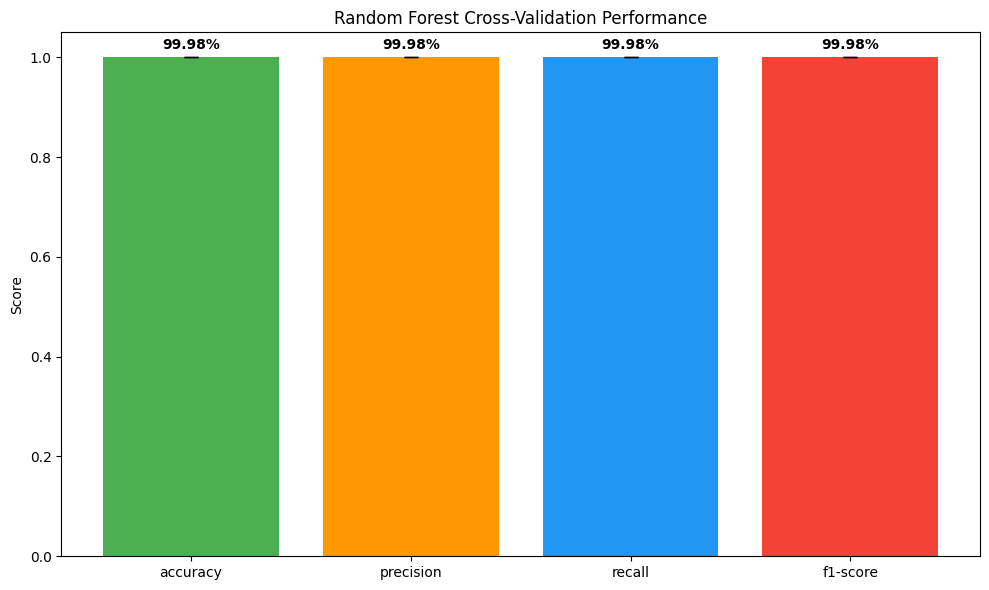

In [47]:
# Cross-validation metrics (example)
metrics = {
    "accuracy": mean_accuracy,
    "precision": mean_precision,
    "recall": mean_recall,
    "f1-score": mean_f1_score
}

# Standard deviations (example)
std_devs = {
    "accuracy": std_accuracy,
    "precision": std_precision,
    "recall": std_recall,
    "f1-score": std_f1_score
}

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
bars = list(metrics.values())
metrics_names = list(metrics.keys())
std_errors = list(std_devs.values())

# Plot bars
ax.bar(metrics_names, bars, yerr=std_errors, capsize=5, color=['#4CAF50', '#FF9800', '#2196F3', '#F44336'])

# Adding percentage on each bar
for i, value in enumerate(bars):
    ax.text(i, value + 0.01, f'{value*100:.2f}%', ha='center', va='bottom', fontweight='bold')

# Set plot labels and title
ax.set_ylabel('Score')
ax.set_title('Random Forest Cross-Validation Performance')

# Display the plot
plt.tight_layout()
plt.show()


### Results Comparision

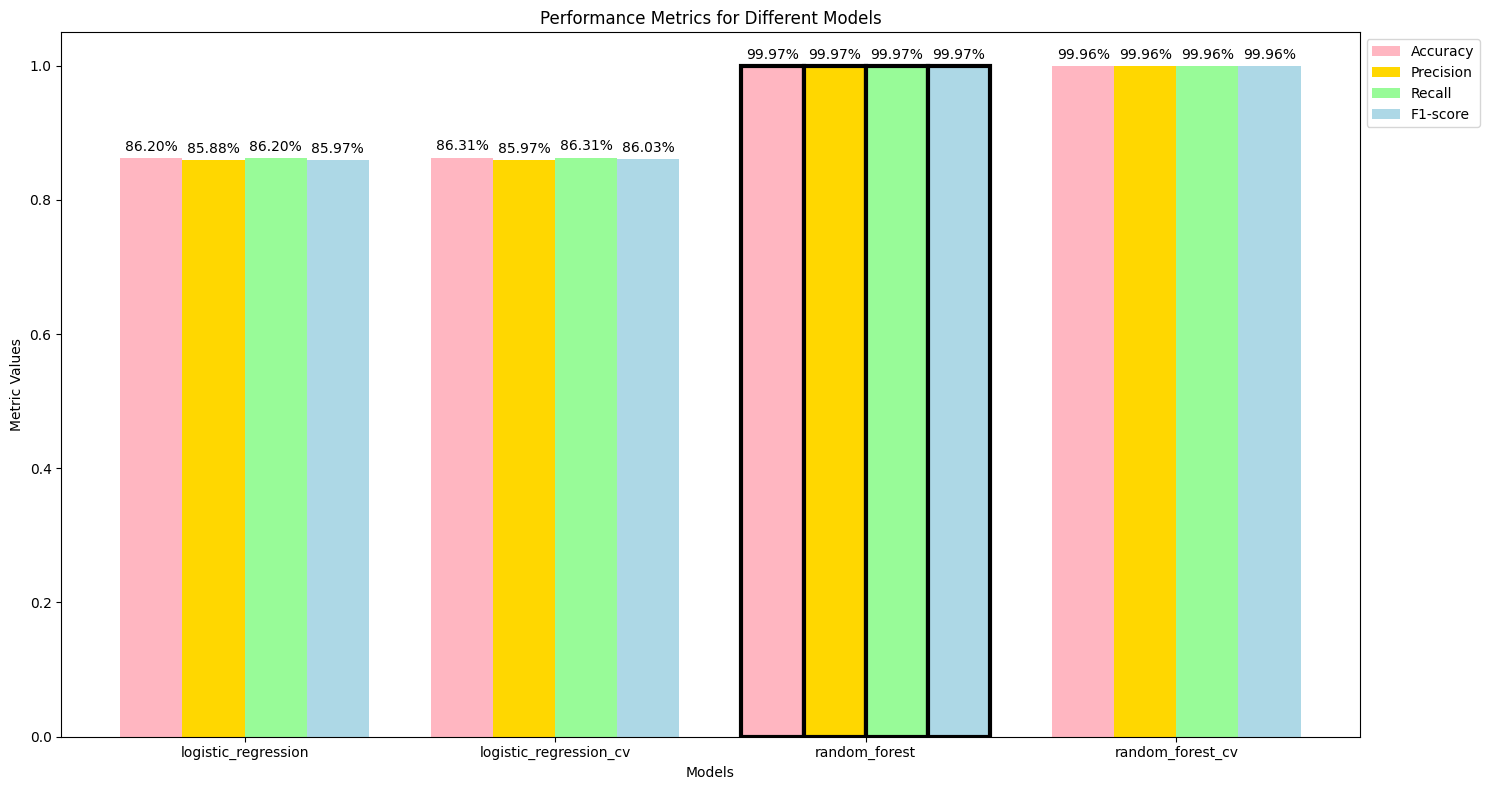

In [48]:
# Sample performance metrics dictionary
performance_metrics = {
    "logistic_regression": {"accuracy": 0.8620, "precision": 0.8588, "recall": 0.8620, "f1-score": 0.8597},
    "logistic_regression_cv": {"accuracy": 0.8631, "precision": 0.8597, "recall": 0.8631, "f1-score": 0.8603},
    "random_forest": {"accuracy": 0.9997, "precision": 0.9997, "recall": 0.9997, "f1-score": 0.9997},
    "random_forest_cv": {"accuracy": 0.9996, "precision": 0.9996, "recall": 0.9996, "f1-score": 0.9996}
}

# Selected models
selected_models = ["logistic_regression", "logistic_regression_cv", "random_forest", "random_forest_cv"]

# Fetch the metrics of each model
accuracy_values = [performance_metrics[key]['accuracy'] for key in selected_models]
precision_values = [performance_metrics[key]['precision'] for key in selected_models]
recall_values = [performance_metrics[key]['recall'] for key in selected_models]
f1_score_values = [performance_metrics[key]['f1-score'] for key in selected_models]

# Setting up bar positions
bar_width = 0.2
model_index = np.arange(len(selected_models))

# Plotting grouped bar charts
plt.figure(figsize=(15, 8))

border_size = 3  # Specify the desired border size

pastel_colors = ['#FFB6C1', '#FFD700', '#98FB98', '#ADD8E6']

# Plot bars
accuracy_bar = plt.bar(model_index, accuracy_values, bar_width, label='Accuracy', edgecolor=['black' if model == 'random_forest' else 'none' for model in selected_models], linewidth=border_size, color=pastel_colors[0])
precision_bar = plt.bar(model_index + bar_width, precision_values, bar_width, label='Precision', edgecolor=['black' if model == 'random_forest' else 'none' for model in selected_models], linewidth=border_size, color=pastel_colors[1])
recall_bar = plt.bar(model_index + 2 * bar_width, recall_values, bar_width, label='Recall', edgecolor=['black' if model == 'random_forest' else 'none' for model in selected_models], linewidth=border_size, color=pastel_colors[2])
f1_score_bar = plt.bar(model_index + 3 * bar_width, f1_score_values, bar_width, label='F1-score', edgecolor=['black' if model == 'random_forest' else 'none' for model in selected_models], linewidth=border_size, color=pastel_colors[3])

# Adding labels and title to the bar chart
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Performance Metrics for Different Models')

plt.xticks(model_index + 1.5 * bar_width, selected_models)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding value to each bar
def adding_value_to_bar(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

adding_value_to_bar(accuracy_bar)
adding_value_to_bar(precision_bar)
adding_value_to_bar(recall_bar)
adding_value_to_bar(f1_score_bar)

plt.tight_layout()
plt.show()
